In [1]:
import numpy as np 
import math
import pandas as pd 
import matplotlib.pyplot as plt
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv') #membaca file dataset Iris

In [3]:
df = pd.DataFrame(iris)
df.drop(df.index[100:], inplace=True) #karena data yang dipakai hanya 100 data pertama, maka sisanya dihapus


In [4]:
kelas = [] #membuat list baru bernama kelas

#memberikan nilai dalam kelas berdasarkan spesies bunga Iris:
# jika spesies Iris = setosa maka bernilai 0
# jika spesies Iris = versicolor maka bernilai 1
for row in df['Species']:
    if row=='Iris-setosa':
        kelas.append(float(0))
    else:
        kelas.append(float(1));
df['fakta'] = kelas #memasukan nilai kelas kedalam kolom pada dataset bernama fakta



61
0.8
error pada epoch  0 = 0.00550089087881
error pada epoch  1 = 0.00540941840328
error pada epoch  2 = 0.00531016738334
error pada epoch  3 = 0.00521644484353
error pada epoch  4 = 0.005129031434
error pada epoch  5 = 0.00507534243387
error pada epoch  6 = 0.00498623631296
error pada epoch  7 = 0.00489554118324
error pada epoch  8 = 0.00477618576069
error pada epoch  9 = 0.00466395846225
error pada epoch  10 = 0.00458488103345
error pada epoch  11 = 0.00449520393426
error pada epoch  12 = 0.00436956050473
error pada epoch  13 = 0.00421169297258
error pada epoch  14 = 0.00413243937303
error pada epoch  15 = 0.00408180788443
error pada epoch  16 = 0.00401041901645
error pada epoch  17 = 0.00392253014586
error pada epoch  18 = 0.00386170188906
error pada epoch  19 = 0.00378689339236
error pada epoch  20 = 0.00370729176565
error pada epoch  21 = 0.00363545015573
error pada epoch  22 = 0.00351184281852
error pada epoch  23 = 0.00344353293493
error pada epoch  24 = 0.00336584890901
error

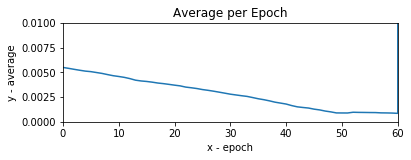

In [18]:
epoch = (int(input()))
alpha = (float(input()))
i = 0
x= [int(k) for k in range (len(df.index))]

initheta1 = [float(0.1)]*100
initheta2 = [float(0.2)]*100
initheta3 = [float(0.3)]*100
initheta4 = [float(0.4)]*100
initbias = [float(0.5)]*100

newtheta1= (list(initheta1))
newtheta2 = (list(initheta2))
newtheta3 = (list(initheta3))
newtheta4 = (list(initheta4))
newbias = (list(initbias))

deltaTheta1 = [float(k) for k in range (len(df.index))]
deltaTheta2 = [float(k) for k in range (len(df.index))]
deltaTheta3 = [float(k) for k in range (len(df.index))]
deltaTheta4 = [float(k) for k in range (len(df.index))]
deltaBias = [float(k) for k in range (len(df.index))]
cost = [float(k) for k in range (len(df.index))]
h = [float(k) for k in range (len(df.index))]
sigmoid = [float(k) for k in range (len(df.index))] 
avgres = [float(k) for k in range (len(df.index))] 
prediksi = [float(k) for k in range (len(df.index))] 

def ha(df,newtheta1,newtheta3,newtheta4,newbias):
    for j in range(len(df.index)):
        h[j] = float((newtheta1[j]*df.at[j,'SepalLengthCm'])+(newtheta2[j]*df.at[j,'SepalWidthCm'])+(newtheta3[j]*df.at[j,'PetalLengthCm'])+(newtheta4[j]*df.at[j,'PetalWidthCm'])+newbias[j])
    
def sigmoidh(h,prediksi):
    for j in range(len(df.index)):
        sigmoid[j] = 1 / (1 + np.exp(-h[j]))
        if sigmoid[j]>0.5:
            prediksi[j]=float(1)
        else:
            prediksi[j]=float(0)
    
        
  

def error(df,sigmoid,prediksi):
    for j in range(len(df.index)):
        cost[j] = float((prediksi[j] - sigmoid[j])**2);

                    
def Teta1(df,sigmoid):
    for j in range(len(df.index)):
        deltaTheta1[j] = float(2 * (sigmoid[j] - df.at[j,'fakta'])*(1-sigmoid[j])*sigmoid[j]*df.at[j,'SepalLengthCm'])
  

def Teta2(df,sigmoid):
    for j in range(len(df.index)):
        deltaTheta2[j] = float(2 * (sigmoid[j] - df.at[j,'fakta'])*(1-sigmoid[j])*sigmoid[j]*df.at[j,'SepalWidthCm'])
       
        
def Teta3(df,sigmoid):
     for j in range(len(df.index)):
        deltaTheta3[j] = float(2 * (sigmoid[j] - df.at[j,'fakta'])*(1-sigmoid[j])*sigmoid[j]*df.at[j,'PetalLengthCm'])
       
        
def Teta4(df,sigmoid):
     for j in range(len(df.index)):
        deltaTheta4[j] = float(2 * (sigmoid[j] - df.at[j,'fakta'])*(1-sigmoid[j])*sigmoid[j]*df.at[j,'PetalWidthCm'])
        
        
def bias(sigmoid):
     for j in range(len(df.index)):
        deltaBias[j] = float(2 * (sigmoid[j] - df.at[j,'fakta'])*(1-sigmoid[j])*sigmoid[j])
       

for i in range(epoch):
    ha(df,newtheta1,newtheta3,newtheta4,newbias)
    sigmoidh(h,prediksi)
    error(df,sigmoid,prediksi)
    Teta1(df,sigmoid)
    Teta2(df,sigmoid)
    Teta3(df,sigmoid)
    Teta4(df,sigmoid)
    bias(sigmoid)

    
    newtheta1[i+1] = float(newtheta1[i] - (alpha*deltaTheta1[i]))
    newtheta2[i+1] = float(newtheta2[i] - (alpha*deltaTheta2[i]))
    newtheta3[i+1] = float(newtheta3[i] - (alpha*deltaTheta3[i]))
    newtheta4[i+1] = float(newtheta4[i] - (alpha*deltaTheta4[i]))
    newbias[i+1] = float(newbias[i] - (alpha*deltaBias[i]))

    avgres[i] = np.mean(cost)
    print('error pada epoch ',i, '=',avgres[i])
    x[i] +=1
    

			
			
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_ylim(0,0.01)
ax1.set_xlim(0,60)

lines = ax1.plot(avgres)
# naming the x axis
plt.xlabel('x - epoch')
# naming the y axis
plt.ylabel('y - average')
 
# giving a title to my graph
plt.title('Average per Epoch')
 
# function to show the plot
plt.show()

